In [1]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Fill in the database you want to work on
working_database = 'Xgridz'

# Fill in your mySQL root pass
my_password = 'dinh9Thuan'

try:
    connection = mysql.connector.connect(host='localhost',
                                         database=working_database,
                                         user='root',
                                         password=my_password)
    if connection.is_connected():
        db_info = connection.get_server_info()
        print('Connected to MySQL Server version ', db_info)
        cursor = connection.cursor()
        
        cursor.execute('select database();')
        record = cursor.fetchone()
        print('Connected to database: ', record)
        
        cursor.execute('show tables;')
        tables = cursor.fetchall()
        print('Tables in {} schema: {}'.format(working_database, tables))
        
        """INSERT DATA TO XGRIDZ"""
        
        # Insert student data from a csv file into student table
        student = pd.read_csv('student.csv')
        Q = ["INSERT INTO student (name, age)\
              VALUES ('{}', '{}');".format(s[0], s[1]) for s in student.values]
        
        for q in Q:
            cursor.execute(q)
        
        q = "SELECT * FROM student;"
        
        cursor.execute(q)
        cursor.fetchall()
        student_table = pd.read_sql_query(q, connection)
        
         # Insert Grid Test 1 data from a csv file into test1 table
        test1 = pd.read_csv('test1.csv')
        Q = ["INSERT INTO test1 (date, correct, total, weight)\
              VALUES ('{}', '{}', '{}', '{}');".\
              format(t[0], t[1], t[2], t[3]) for t in test1.values]
    
        for q in Q:
            cursor.execute(q)
         
        q = "SELECT * FROM test1;"
        
        cursor.execute(q)
        cursor.fetchall()
        test1_table = pd.read_sql_query(q, connection)
        
         # Insert Grid Test 2 data from a csv file into test2 table
        test2 = pd.read_csv('test2.csv')
        Q = ["INSERT INTO test2 (date, correct, total, weight)\
              VALUES ('{}', '{}', '{}', '{}');".\
              format(t[0], t[1], t[2], t[3]) for t in test2.values]
        
        for q in Q:
            cursor.execute(q)
         
        q = "SELECT * FROM test2;"
        
        cursor.execute(q)
        cursor.fetchall()
        test2_table = pd.read_sql_query(q, connection)
        
        
        """RUN THE QUERY OF REQUEST"""
        cutoff = .6

        q = "SELECT test_date, student_ID, name, age,\
            (correct_1 / total_1) AS score_1,\
            (correct_2 / total_2) AS score_2,\
            ((correct_1 * weight_1 + correct_2 * weight_2) / (total_1 + total_2)) AS score\
             FROM (SELECT test1.date AS test_date, s.ID AS student_ID, s.name, s.age,\
                          test1.correct AS correct_1, test1.total AS total_1, test1.weight AS weight_1,\
                          test2.correct AS correct_2, test2.total AS total_2, test2.weight AS weight_2 \
                   FROM student AS s\
                               INNER JOIN test1 ON s.ID = test1.student_ID \
                               INNER JOIN test2 ON s.ID = test2.student_ID) sub \
             HAVING score <  {}\
             ORDER BY score DESC;".format(cutoff)
        
        cursor.execute(q)
        cursor.fetchall()
        result_table = pd.read_sql_query(q, connection)
        
        # Join 3 tables into one
        sub_q = "SELECT test1.date AS test_date, s.ID AS student_ID, s.name, s.age,\
                        test1.correct AS correct_1, test1.total AS total_1, test1.weight AS weight_1,\
                        test2.correct AS correct_2, test2.total AS total_2, test2.weight AS weight_2 \
                 FROM student AS s\
                              INNER JOIN test1 ON s.ID = test1.student_ID \
                              INNER JOIN test2 ON s.ID = test2.student_ID"
        cursor.execute(sub_q)
        cursor.fetchall()
        join_table = pd.read_sql_query(sub_q, connection)
        
except Error as e:
    print('Error while connecting to MySQL', e)

finally:
    if (connection.is_connected()):
        cursor.close()
        connection.close()
        print('\n', '* ' * 40, '\n')
        print('MySQL connection is closed.')

Connected to MySQL Server version  8.0.23
Connected to database:  ('xgridz',)
Tables in Xgridz schema: [('student',), ('test1',), ('test2',)]

 * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *  

MySQL connection is closed.


In [2]:
student_table

,ID,name,age
0,100,Koen Frederick,8-9
1,101,Brent Hinton,4-5
2,102,Mitchell Wheeler,4-5
3,103,Pierce Mullen,6-7
4,104,Tara Chase,8-9
5,105,Melany Clay,6-7
6,106,Gavyn Nielsen,4-5
7,107,Anya Ryan,8-9
8,108,Kadin Carey,6-7
9,109,Lyla Alvarado,4-5


In [3]:
test1_table

,student_ID,date,correct,total,weight
0,100,May 29 2020,4,5,1
1,101,May 30 2020,1,5,1
2,102,Aug. 27 2020,4,5,1
3,103,Aug. 11 2020,1,5,1
4,104,Apr. 21 2020,2,5,1
5,105,Oct. 5 2020,3,5,1
6,106,Oct. 2 2020,0,5,1
7,107,Apr. 3 2020,1,5,1
8,108,Nov. 7 2020,1,5,1
9,109,Aug. 29 2020,1,5,1


In [4]:
test2_table

,student_ID,date,correct,total,weight
0,100,May 29 2020,6,12,1
1,101,May 30 2020,7,12,1
2,102,Aug. 27 2020,4,12,1
3,103,Aug. 11 2020,6,12,1
4,104,Apr. 21 2020,4,12,1
5,105,Oct. 5 2020,6,12,1
6,106,Oct. 2 2020,10,12,1
7,107,Apr. 3 2020,3,12,1
8,108,Nov. 7 2020,11,12,1
9,109,Aug. 29 2020,1,12,1


In [5]:
result_table

,test_date,student_ID,name,age,score_1,score_2,score
0,May 29 2020,100,Koen Frederick,8-9,0.8,0.5000,0.5882
1,Aug 05 2020,154,Stephanie Smith,8-9,0.6,0.5833,0.5882
2,Oct 21 2020,147,Anna Marina,4-5,0.6,0.5833,0.5882
3,Oct. 2 2020,106,Gavyn Nielsen,4-5,0.0,0.8333,0.5882
4,Mar 10 2021,159,Kate Macleod,6-7,0.6,0.5000,0.5294
5,Oct. 5 2020,105,Melany Clay,6-7,0.6,0.5000,0.5294
6,Jun. 15 2020,117,Sean Matthews,4-5,0.4,0.5833,0.5294
7,Jul. 25 2020,120,Holden Benton,6-7,0.6,0.5000,0.5294
8,Nov. 11 2020,121,Isai Wilson,8-9,0.0,0.7500,0.5294
9,Sep 02 2020,144,Leonel Martinez,4-5,0.6,0.5000,0.5294


In [6]:
join_table

,test_date,student_ID,name,age,correct_1,total_1,weight_1,correct_2,total_2,weight_2
0,May 29 2020,100,Koen Frederick,8-9,4,5,1,6,12,1
1,May 30 2020,101,Brent Hinton,4-5,1,5,1,7,12,1
2,Aug. 27 2020,102,Mitchell Wheeler,4-5,4,5,1,4,12,1
3,Aug. 11 2020,103,Pierce Mullen,6-7,1,5,1,6,12,1
4,Apr. 21 2020,104,Tara Chase,8-9,2,5,1,4,12,1
5,Oct. 5 2020,105,Melany Clay,6-7,3,5,1,6,12,1
6,Oct. 2 2020,106,Gavyn Nielsen,4-5,0,5,1,10,12,1
7,Apr. 3 2020,107,Anya Ryan,8-9,1,5,1,3,12,1
8,Nov. 7 2020,108,Kadin Carey,6-7,1,5,1,11,12,1
9,Aug. 29 2020,109,Lyla Alvarado,4-5,1,5,1,1,12,1


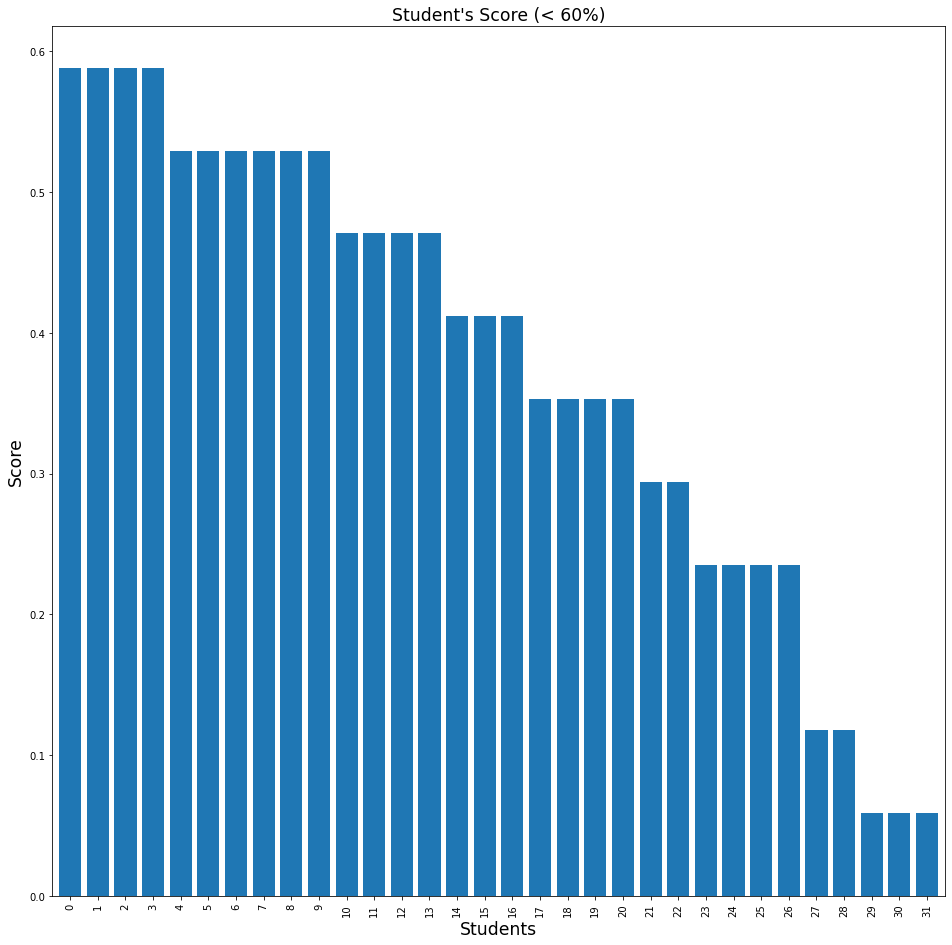

In [7]:
plt.title('Student\'s Score (< 60%)', fontsize='xx-large')
plt.xlabel('Students', fontsize='xx-large')
plt.ylabel('Score', fontsize='xx-large')
result_table['score'].plot.bar(result_table.score, figsize=(16,16), width=.8);

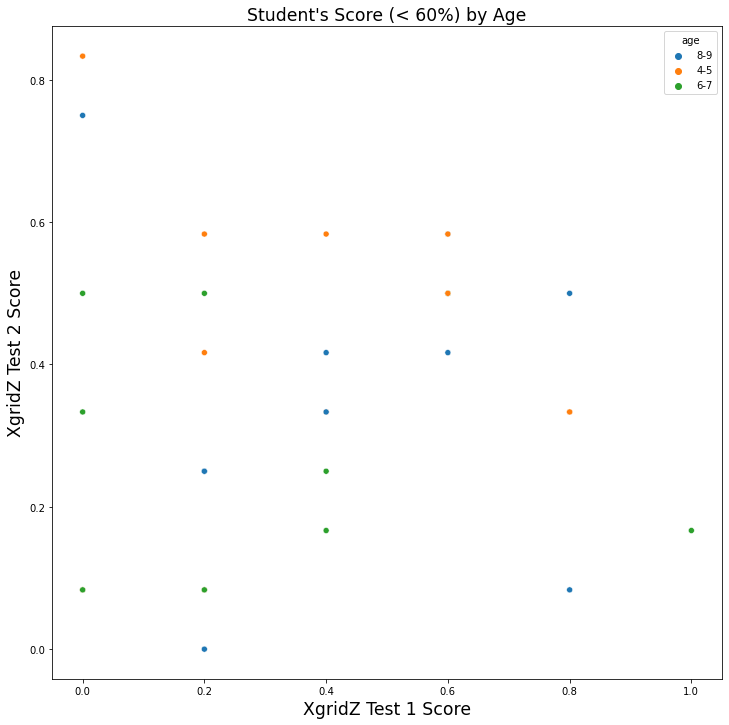

In [8]:
plt.gcf().set_size_inches(12,12)
plt.title('Student\'s Score (< 60%) by Age', fontsize='xx-large')
plt.xlabel('XgridZ Test 1 Score', fontsize='xx-large')
plt.ylabel('XgridZ Test 2 Score', fontsize='xx-large')
sns.scatterplot(x='score_1', y='score_2', hue='age', data=result_table);

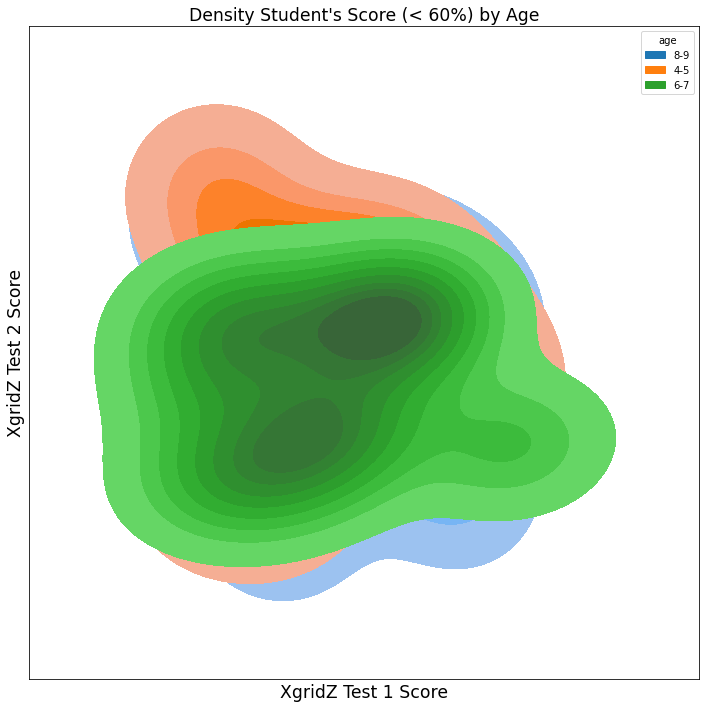

In [9]:
plt.gcf().set_size_inches(12,12)
plt.title('Density Student\'s Score (< 60%) by Age', fontsize='xx-large')
plt.xticks([])
plt.yticks([])
plt.xlabel('XgridZ Test 1 Score', fontsize='xx-large')
plt.ylabel('XgridZ Test 2 Score', fontsize='xx-large')
sns.kdeplot(data=result_table, x='score_1', y='score_2', hue='age', shade=True); 

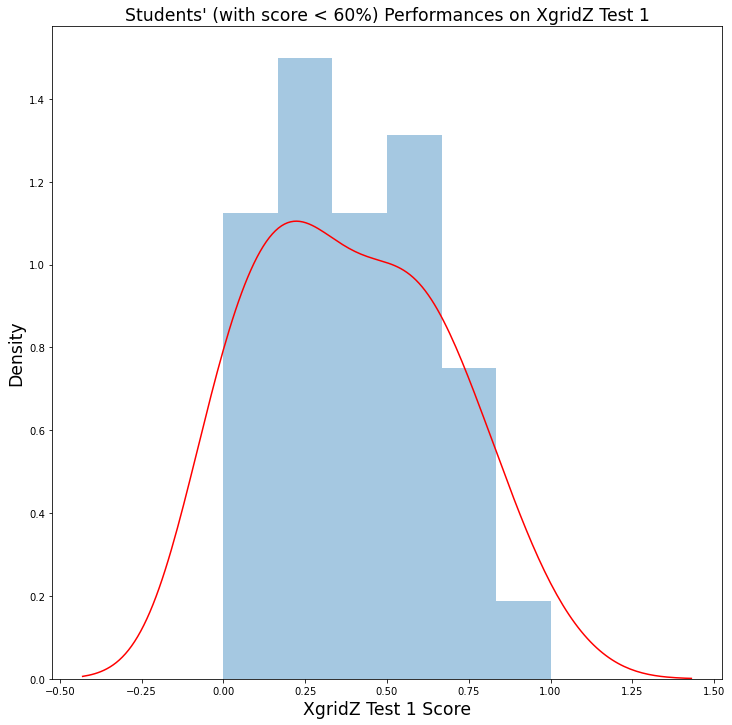

In [10]:
plt.gcf().set_size_inches(12,12)
plt.title('Students\' (with score < 60%) Performances on XgridZ Test 1', fontsize='xx-large')
sns.distplot(result_table.score_1, bins=6, kde=True, kde_kws = {'color':'r'})
plt.ylabel('Density', fontsize='xx-large')
plt.xlabel('XgridZ Test 1 Score', fontsize='xx-large');

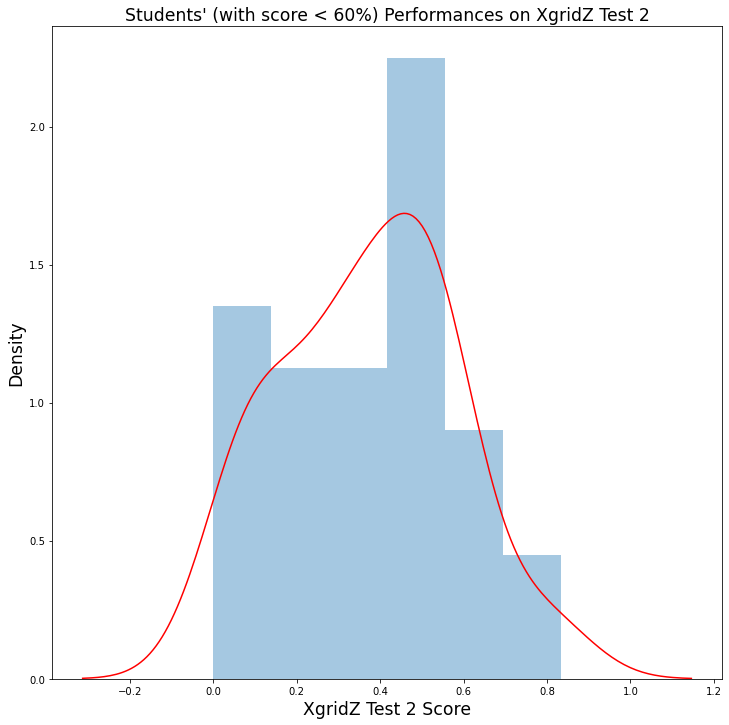

In [11]:
plt.gcf().set_size_inches(12,12)
sns.distplot(result_table.score_2, bins=6, kde=True, kde_kws = {'color':'r'})
plt.title('Students\' (with score < 60%) Performances on XgridZ Test 2', fontsize='xx-large')
plt.ylabel('Density', fontsize='xx-large')
plt.xlabel('XgridZ Test 2 Score', fontsize='xx-large');